In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1

## Part A

From the table included in the assignment, we see that the average energy transferred and absorbed in lead per photon interaction is

* $\bar{E}_{\text{tr}} = 2.70~\text{MeV}$
* $\bar{E}_{\text{ab}} = 2.35~\text{MeV}$

We thus have that

* The average energy transferred/absorbed in the slab is thus $N_{\text{int}}\bar{E}_{\text{tr}}$ and $N_{\text{int}}\bar{E}_{\text{ab}}$ respectively, where $N_{\text{int}}$ is the number of interactions inside the slab.
* The initial energy of the beam is $N_0 E_0$ where $N_0$ is the initial number of photons and $E_0=4~\text{MeV}$ is the initial energy of each photon in the beam

It follows that

* The percent of energy transfered/absorbed in the slab is given by $\frac{N_{\text{int}}\bar{E}_{\text{tr}}}{N_0 E_0}$ and $\frac{N_{\text{int}}\bar{E}_{\text{ab}}}{N_0 E_0}$

Letting $x_1 = 1~\text{cm}$ and $x_2 = 1.5~\text{cm}$ (the distance the photons have travelled in total after the slab) we can determine $N_{\text{int}}/N_0$ as follows:

$$
\begin{align}
N_{\text{int}} &= N(x_1) - N(x_2)\\
&= N_0e^{-\mu x_1} - N_0e^{-\mu x_2}\\
\end{align}
$$

and thus 

$$(N_{\text{int}}/N_0) = e^{-\mu x_1} - e^{-\mu x_2}$$


Define constants:

In [2]:
E0 = 4 # MeV
E_tr = 2.7 # MeV
E_ab = 2.35 # MeV
x1 = 1 #cm
x2 = 1.5 #cm
rho = 11360 #kg/m^3
mu_rho = 0.0415/10 #m^2 / kg
mu = rho * mu_rho /100 #cm-1

Determine values

In [3]:
Nint_N0 = np.exp(-mu*x1) - np.exp(-mu*x2)
pct_transferred = Nint_N0 * E_tr / E0

So that

In [4]:
print(f'The percent of initial energy transferred in the slab is {100*pct_transferred:.2f}%')

The percent of initial energy transferred in the slab is 8.85%


## Part B

Similarily,

In [5]:
pct_abs = Nint_N0 * E_ab / E0
print(f'The percent of initial energy absorbed in the slab is {100*pct_abs:.2f}%')

The percent of initial energy absorbed in the slab is 7.70%


## Part C

The amount of energy radiated away as Bremsstrahlung is the difference between the energy transferred and the energy absorbed in the slab:

In [6]:
pct_brem = pct_transferred - pct_abs
print(f'The percent of initial energy radiated as Bremsstrahlung in the slab is {100*pct_brem:.2f}%')

The percent of initial energy radiated as Bremsstrahlung in the slab is 1.15%


## Part D

The percent of initial energy scattered in the slab is equal to the amount absorbed:

In [7]:
print(f'The percent of initial energy scattered in the slab is {100*pct_abs:.2f}%')

The percent of initial energy scattered in the slab is 7.70%


# Question 2

Letting $\phi$ the fluence of the beam, we know that

$$\phi(x) = \phi_0 e^{-\mu x} B$$

where $B$ is the buildup factor. Let $x_1 = 47~\text{cm}$ we are given that

* $\phi_0 = 10^{10}~s^{-1}\text{cm}^{-2}$
* $\phi_0 e^{-\mu x_1} B = 3.95 \cdot 10^{9}~s^{-1}\text{cm}^{-2}$
* $\phi_0 e^{-\mu x_1} = 3.4 \cdot 10^{9}~s^{-1}\text{cm}^{-2}$

In [8]:
x1 = 47 #cm
fluence_rate = 3.95e9 #cm^2 s^-1
fluence_rate_primary= 3.4e9 #cm^2 s^-1
fluence_front = 1e10 #cm^2 s^-1

$B$ is found by dividing the fluence rates

In [9]:
B = fluence_rate/fluence_rate_primary
print(f'B={B:.2f}')

B=1.16


$\mu$ can be solved for as

$$\mu = \ln \left(\frac{\phi_0}{\phi}\right) / x_1 $$

where $\phi$ is the fluence from primary radiation:

In [10]:
u = np.log(fluence_front/fluence_rate_primary) / x1
print(f'The linear attenuation coefficient is u={u:.5f} cm-2')

The linear attenuation coefficient is u=0.02295 cm-2


# Question 3

First we get the parameters for our beam

In [11]:
df = pd.read_excel('a1data.xlsx')
E = df['E (MeV)'].values
dPhidE = df['Initial spectrum FE (arbitrary units)'].values

In [12]:
dPhidE

array([0.   , 0.032, 0.06 , 0.086, 0.109, 0.131, 0.151, 0.185, 0.212,
       0.238, 0.257, 0.274, 0.256, 0.205, 0.147, 0.096, 0.029, 0.002])

We can look at the distribution of $d\Phi/dE$ (the spectral density of our photon energies).

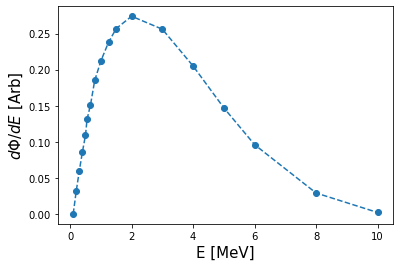

In [13]:
plt.plot(E,dPhidE, 'o--')
plt.ylabel('$d\Phi/dE$ [Arb]', fontsize=15)
plt.xlabel('E [MeV]', fontsize=15)
plt.show()

We will solve the problem as follows:

* Apply a spline fit to the curve (cubic)
* Use the interpolation function to numerically compute the integrals

This is easier than dealing with bins of different widths.

In [14]:
from scipy.interpolate import interp1d

Anything that ends with `_f`, such as `dPhidE_f` is a **function** that takes in an energy and returns a value of $d\Phi/dE$

In [15]:
dPhidE_f = interp1d(E, dPhidE, kind='cubic')
E_cont = np.linspace(min(E), max(E), 100)

Look at data and cubic-spline fit:

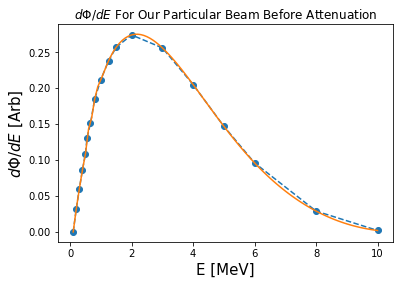

In [16]:
E_cont = np.linspace(min(E), max(E), 100)
plt.plot(E,dPhidE, 'o--')
plt.plot(E_cont, dPhidE_f(E_cont), ls='-')
plt.ylabel('$d\Phi/dE$ [Arb]', fontsize=15)
plt.xlabel('E [MeV]', fontsize=15)
plt.title('$d\Phi/dE$ For Our Particular Beam Before Attenuation')
plt.show()

## Part 1

Assuming the number of photons at a particular energy is *directly proportional* to the spectral density $S=d\Phi/dE$ given, and since we are given discrete data,

$$\bar{E} = \frac{\int E (d\Phi/dE) dE}{\int (d\Phi/dE) dE}$$

In [17]:
from scipy.integrate import quad

In [18]:
num = quad(lambda x: x*dPhidE_f(x), min(E), max(E))[0]
den = quad(lambda x: dPhidE_f(x), min(E), max(E))[0]
E_mean = num/den
print(f'The mean energy is {E_mean:.2f} MeV')

The mean energy is 3.38 MeV


## Part 2

The attenuated mean for discrete data is given by

$$\bar{E}_{\text{att}} = \frac{\int E  (d\Phi/dE) e^{-\mu(E) x} dE}{\int (d\Phi/dE) e^{-\mu(E) x} dE}$$

Firstly, we obtain atomic attenuation coefficients

**For Lead**

In [19]:
df = pd.read_excel('a1data.xlsx', sheet_name = 3, skiprows=7)
E = df['E, MeV'].values
mu_a = df['atomic attenuation coefficients (10-24 cm2/atom)'].values * 1e-24

In [20]:
A_lead = 207.2
rho_lead = 11.36
NA = 6.02e23
mu_lead = NA*rho_lead / A_lead * mu_a

This is the main function we wish to obtain:

In [21]:
mu_lead_f = interp1d(E, mu_lead, kind='cubic')

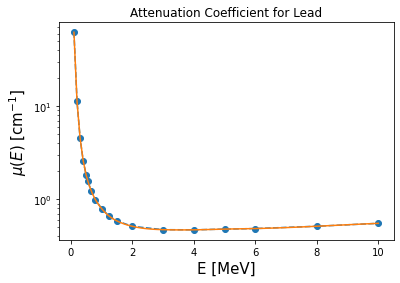

In [22]:
E_cont = np.linspace(min(E), max(E), 100)
plt.semilogy(E,mu_lead, 'o--')
plt.semilogy(E_cont, mu_lead_f(E_cont), ls='-')
plt.ylabel('$\mu(E)$ [cm$^{-1}$]', fontsize=15)
plt.xlabel('E [MeV]', fontsize=15)
plt.title('Attenuation Coefficient for Lead')
plt.show()

We can do a similar thing for $CH_4$.

In [23]:
# Carbon
df = pd.read_excel('a1data.xlsx', sheet_name = 2, skiprows=7)
E = df['E, MeV'].values
mu_a = df['atomic attenuation coefficients (10-24 cm2/atom)'].values * 1e-24
A_carbon = 12.011
rho_carbon = 2.25
mu_carbon = NA*rho_carbon / A_carbon * mu_a

# Hydrogen
df = pd.read_excel('a1data.xlsx', sheet_name = 1, skiprows=7)
E = df['E, MeV'].values
mu_a = df['atomic attenuation coefficients (10-24 cm2/atom)'].values * 1e-24
A_hydrogen = 12.011
rho_hydrogen = 2.25
mu_hydrogen = NA*rho_hydrogen / A_hydrogen * mu_a

Now we know that for mass attenuation coefficients

$$(\mu/\rho) = \frac{\sum_i m_i (\mu/\rho)_i}{\sum m_i} \implies \mu = \rho \frac{\sum_i m_i (\mu/\rho)_i}{\sum m_i}$$

In [24]:
rho_CH4 = 1 #g/cm^3
mu_CH4 = rho_CH4 * (4*A_hydrogen*mu_hydrogen/rho_hydrogen \
                    + A_carbon*mu_carbon/rho_carbon) / (4*A_hydrogen+A_carbon)

In [25]:
mu_CH4

array([0.04999041, 0.04277302, 0.03549048, 0.03178857, 0.02901388,
       0.02782302, 0.02567083, 0.02357278, 0.02118703, 0.01894664,
       0.01723952, 0.01476657, 0.01176935, 0.00999207, 0.00880421,
       0.00793411, 0.00679437, 0.0061037 ])

Now we get the interpolated function

In [26]:
mu_CH4_f = interp1d(E, mu_CH4, kind='cubic')

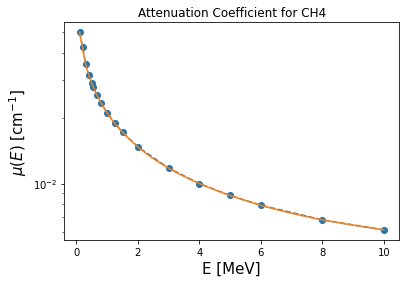

In [27]:
E_cont = np.linspace(min(E), max(E), 100)
plt.semilogy(E,mu_CH4, 'o--')
plt.semilogy(E_cont, mu_CH4_f(E_cont), ls='-')
plt.ylabel('$\mu(E)$ [cm$^{-1}$]', fontsize=15)
plt.xlabel('E [MeV]', fontsize=15)
plt.title('Attenuation Coefficient for CH4')
plt.show()

Now we can compute

$$\bar{E}_{\text{att}} = \frac{\int E e^{-\mu(E) x} (d\Phi/dE) dE}{\int (d\Phi/dE) dE}$$

for each substance. Since $\rho \cdot d = 20~\text{cm/g}$ we have

* $d_{\text{lead}} = 20/ \rho_{\text{lead}}$
* $d_{\text{CH4}} = 20/ \rho_{\text{CH4}}$

In [34]:
d_lead = 20/rho_lead
d_CH4 = 20/rho_CH4

# Compute numerator and denominator of expression above for both lead and CH4:
num_lead = quad(lambda x: x*dPhidE_f(x)*np.exp(-mu_lead_f(x) * d_lead),
                min(E), max(E))[0]
num_CH4 = quad(lambda x: x*dPhidE_f(x)*np.exp(-mu_CH4_f(x) * d_CH4),
                min(E), max(E))[0]
den_lead = quad(lambda x: dPhidE_f(x)*np.exp(-mu_lead_f(x) * d_lead), min(E), max(E))[0]

den_CH4 = quad(lambda x: dPhidE_f(x)*np.exp(-mu_CH4_f(x) * d_CH4), min(E), max(E))[0]

Finally, print the quantities:

In [35]:
E_mean_lead = num_lead / den_lead
E_mean_CH4 = num_CH4 / den_CH4
print(f'The mean attenuated energy for lead is {E_mean_lead:.6f} MeV')
print(f'The mean attenuated energy for CH4 is {E_mean_CH4:.2f} MeV')

The mean attenuated energy for lead is 3.626132 MeV
The mean attenuated energy for CH4 is 3.55 MeV


In other words, the average energy of the beam increases more when attenuated through lead than through parafin.